<a href="https://colab.research.google.com/github/Elman295/Deep-Learning-Course-INFO/blob/main/CI_Modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import torch
from torch import nn
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

#`Activation Functions`

In [40]:
x_sin = torch.arange(start = -10, end = 10, step = 0.1, requires_grad = True)

In [41]:
y_sin = torch.sin(x_sin)
y_sin.backward(gradient = torch.ones_like(y_sin))

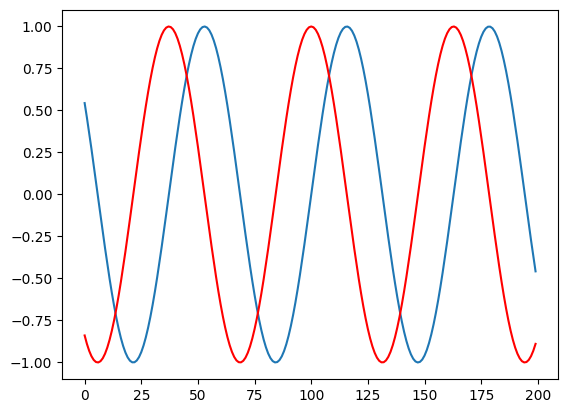

In [42]:
plt.plot(y_sin.detach().numpy())
plt.plot(x_sin.grad, color = "red")
plt.show()

In [43]:
x_sig = torch.arange(start = -10, end = 10, step = 0.1, requires_grad = True)

In [44]:
sigmoid = nn.Sigmoid()
y_sig = sigmoid(x_sig)
y_sig.backward(gradient = torch.ones_like(y_sig))

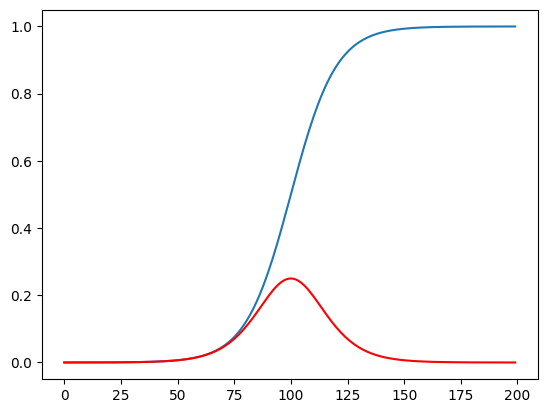

In [45]:
plt.plot(y_sig.detach().numpy())
plt.plot(x_sig.grad, color = "red")
plt.show()

In [46]:
x_tan = torch.arange(start = -10, end = 10, step = 0.1, requires_grad = True)

In [47]:
tanh = nn.Tanh()
y_tan = tanh(x_tan)
y_tan.backward(gradient = torch.ones_like(y_tan))

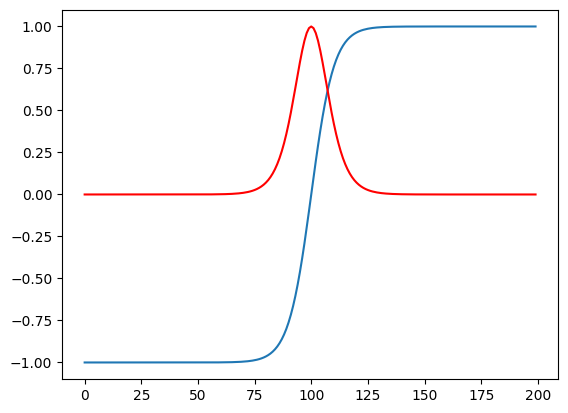

In [48]:
plt.plot(y_tan.detach().numpy())
plt.plot(x_tan.grad, color = "red")
plt.show()

In [49]:
x_relu = torch.arange(start = -10, end = 10, step = 0.1, requires_grad = True)

In [50]:
relu = nn.ReLU()
y_relu = relu(x_relu)
y_relu.backward(gradient = torch.ones_like(y_relu))

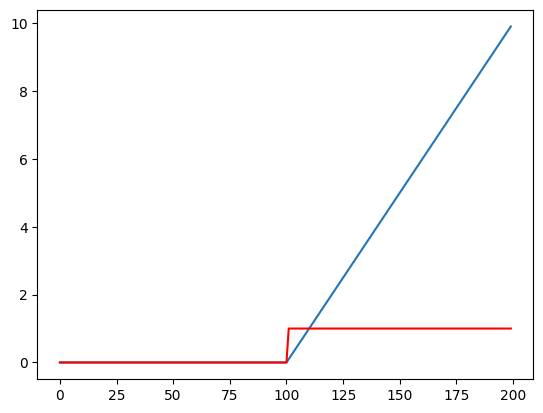

In [51]:
plt.plot(y_relu.detach().numpy())
plt.plot(x_relu.grad, color = "red")
plt.show()

In [52]:
x_elu = torch.arange(start = -10, end = 10, step = 0.1, requires_grad = True)

In [53]:
elu = nn.ELU()
y_elu = elu(x_elu)
y_elu.backward(gradient = torch.ones_like(y_elu))

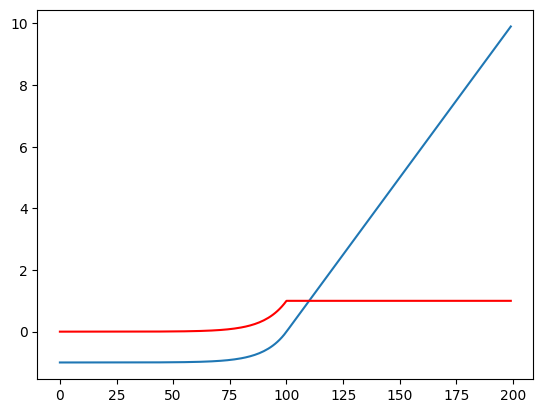

In [54]:
plt.plot(y_elu.detach().numpy())
plt.plot(x_elu.grad, color = "red")
plt.show()

In [55]:
x_gelu = torch.arange(start = -10, end = 10, step = 0.1, requires_grad = True)

In [56]:
gelu = nn.GELU()
y_gelu = gelu(x_gelu)
y_gelu.backward(gradient = torch.ones_like(y_gelu))

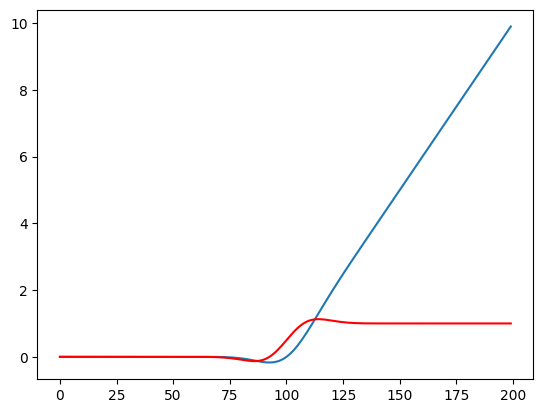

In [57]:
plt.plot(y_gelu.detach().numpy())
plt.plot(x_gelu.grad, color = "red")
plt.show()

#`Layers`

In [59]:
x = torch.randn(size = (128,))

In [60]:
linear = nn.Linear(128, 10)
y = linear(x)

In [61]:
y.shape

torch.Size([10])

In [62]:
lazy_linear = nn.LazyLinear(10)
y = lazy_linear(x)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [63]:
y.shape

torch.Size([10])

In [69]:
x = torch.randn(size = (10,3,10,10))

In [70]:
conv2d = nn.Conv2d(3,1,3,1)

In [71]:
print(conv2d(x).shape)

torch.Size([10, 1, 8, 8])


In [72]:
conv2d_lazy = nn.LazyConv2d(1,3,1)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [73]:
print(conv2d_lazy(x).shape)

torch.Size([10, 1, 8, 8])


In [74]:
flatten = nn.Flatten()

In [75]:
flatten(x).shape

torch.Size([10, 300])

In [77]:
x.view((-1,300)).shape

torch.Size([10, 300])

#`Loss Functions`

In [80]:
y_true = torch.tensor([1,2,3])
y_pred = torch.tensor([0.9,1.9,2.9])

In [81]:
loss_mse = nn.MSELoss()
loss_mse(y_pred, y_true)

tensor(0.0100)

In [86]:
y_true = torch.tensor([0.8,0.2,0,0])
y_pred = torch.tensor([0.7,0.2,0.1,0])

In [87]:
loss_cross = nn.CrossEntropyLoss()
loss_cross(y_pred, y_true)

tensor(1.0753)

#`Train and Test Functions`

In [88]:
def train(Data, Model, Loss_fn, Optimizer):

  size = len(Data.dataset)

  Model.train()

  for batch, (x,y) in enumerate(Data):
    y_pred = Model(x)
    loss = Loss_fn(y_pred, y)
    Optimizer.zero_grad()
    loss.backward()
    Optimizer.step()

    if size % 100 ==0 :
      loss, current = loss.item(), batch * len(x)
      print(f"Loss: {loss} [{current} / {size}]")

In [89]:

def test(Data, Model, Loss_fn):

  size = len(Data.dataset)
  num_batch = len(Data)
  correct, test_loss = 0,0
  Model.eval()

  with torch.no_grad():
    for x,y in Data:
      y_pred = Model(x)
      test_loss += Loss_fn(y_pred, y).item()
      correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batch
    correct /= size
    print(f"Test Loss: {test_loss} Accuracy:{correct * 100}")


#`Train LOOP`

In [139]:
train_ds = datasets.MNIST(

     root = "data",
     train = True,
     download = True,
     transform = transforms.ToTensor()
)

test_ds = datasets.MNIST(

     root = "data",
     download = True,
     train = False,
     transform = transforms.ToTensor()
)


In [140]:
train_dl = DataLoader(train_ds, batch_size = 256, shuffle = True)

test_dl = DataLoader(test_ds, batch_size = 256, shuffle = False)

In [142]:


class MLP(nn.Module):

  def __init__(self, output_node):
    super(MLP, self).__init__()

    self.linear_1 = nn.Linear(1*28*28, 514)
    self.linear_2 = nn.Linear(514, output_node)


  def forward(self, x):
    x = x.view((-1,1*28*28))
    x = F.sigmoid(self.linear_1(x))
    x = self.linear_2(x)
    return x

In [143]:

mlp = MLP(10)

In [145]:
loss_fn = nn.CrossEntropyLoss()
opt_1 = torch.optim.SGD(mlp.parameters(), 1)

In [146]:

EPOCHS = 5

for epoch in range(EPOCHS):
  print(f"epoch:{epoch+1}=-=-=-=-=-=--=-==--=-=-=")
  train(train_dl, mlp,loss_fn, opt_1)
  test(test_dl, mlp, loss_fn)

epoch:1=-=-=-=-=-=--=-==--=-=-=
Loss: 2.358031988143921 [0 / 60000]
Loss: 7.669881343841553 [256 / 60000]
Loss: 16.989704132080078 [512 / 60000]
Loss: 20.41990852355957 [768 / 60000]
Loss: 11.086256980895996 [1024 / 60000]
Loss: 9.629712104797363 [1280 / 60000]
Loss: 5.959412097930908 [1536 / 60000]
Loss: 5.839497089385986 [1792 / 60000]
Loss: 4.869235992431641 [2048 / 60000]
Loss: 4.628490447998047 [2304 / 60000]
Loss: 4.298393726348877 [2560 / 60000]
Loss: 3.5815370082855225 [2816 / 60000]
Loss: 3.307673215866089 [3072 / 60000]
Loss: 3.153721809387207 [3328 / 60000]
Loss: 3.100616931915283 [3584 / 60000]
Loss: 2.98895525932312 [3840 / 60000]
Loss: 2.9946558475494385 [4096 / 60000]
Loss: 2.8385186195373535 [4352 / 60000]
Loss: 2.743774890899658 [4608 / 60000]
Loss: 2.72458553314209 [4864 / 60000]
Loss: 2.677961826324463 [5120 / 60000]
Loss: 2.3544390201568604 [5376 / 60000]
Loss: 2.6392087936401367 [5632 / 60000]
Loss: 2.5481150150299072 [5888 / 60000]
Loss: 2.342755079269409 [6144 / 

In [150]:

class MLP(nn.Module):

  def __init__(self, output_node):
    super(MLP, self).__init__()

    self.linear_1 = nn.Linear(1*28*28, 514)
    self.linear_2 = nn.Linear(514, output_node)


  def forward(self, x):
    x = x.view((-1,1*28*28))
    x = F.sigmoid(self.linear_1(x))
    x = self.linear_2(x)
    return x

In [151]:

mlp = MLP(10)

In [152]:
loss_fn = nn.CrossEntropyLoss()
opt_2 = torch.optim.SGD(mlp.parameters(), 10)

In [153]:

EPOCHS = 5

for epoch in range(EPOCHS):
  print(f"epoch:{epoch+1}=-=-=-=-=-=--=-==--=-=-=")
  train(train_dl, mlp,loss_fn, opt_2)
  test(test_dl, mlp, loss_fn)

epoch:1=-=-=-=-=-=--=-==--=-=-=
Loss: 2.3765289783477783 [0 / 60000]
Loss: 73.28863525390625 [256 / 60000]
Loss: 3.3472189903259277 [512 / 60000]
Loss: 3.071333169937134 [768 / 60000]
Loss: 3.1121723651885986 [1024 / 60000]
Loss: 2.887515068054199 [1280 / 60000]
Loss: 2.6210029125213623 [1536 / 60000]
Loss: 2.5223770141601562 [1792 / 60000]
Loss: 2.531611680984497 [2048 / 60000]
Loss: 2.3891513347625732 [2304 / 60000]
Loss: 2.3512797355651855 [2560 / 60000]
Loss: 2.2929582595825195 [2816 / 60000]
Loss: 2.3443763256073 [3072 / 60000]
Loss: 2.3160288333892822 [3328 / 60000]
Loss: 2.3404085636138916 [3584 / 60000]
Loss: 2.3156843185424805 [3840 / 60000]
Loss: 2.3346455097198486 [4096 / 60000]
Loss: 2.3086533546447754 [4352 / 60000]
Loss: 2.2955322265625 [4608 / 60000]
Loss: 2.3372437953948975 [4864 / 60000]
Loss: 2.303908348083496 [5120 / 60000]
Loss: 2.307053804397583 [5376 / 60000]
Loss: 2.319115400314331 [5632 / 60000]
Loss: 2.2981796264648438 [5888 / 60000]
Loss: 2.3198020458221436 [6

In [154]:
class MLP(nn.Module):

  def __init__(self, output_node):
    super(MLP, self).__init__()

    self.linear_1 = nn.Linear(1*28*28, 514)
    self.linear_2 = nn.Linear(514, output_node)


  def forward(self, x):
    x = x.view((-1,1*28*28))
    x = F.sigmoid(self.linear_1(x))
    x = self.linear_2(x)
    return x

In [155]:
mlp = MLP(10)

In [156]:
loss_fn = nn.CrossEntropyLoss()
opt_3 = torch.optim.SGD(mlp.parameters(), 1e-7)

In [157]:
EPOCHS = 5

for epoch in range(EPOCHS):
  print(f"epoch:{epoch+1}=-=-=-=-=-=--=-==--=-=-=")
  train(train_dl, mlp,loss_fn, opt_3)
  test(test_dl, mlp, loss_fn)

epoch:1=-=-=-=-=-=--=-==--=-=-=
Loss: 2.330662965774536 [0 / 60000]
Loss: 2.3533775806427 [256 / 60000]
Loss: 2.3060483932495117 [512 / 60000]
Loss: 2.3258955478668213 [768 / 60000]
Loss: 2.324171543121338 [1024 / 60000]
Loss: 2.335125207901001 [1280 / 60000]
Loss: 2.3708887100219727 [1536 / 60000]
Loss: 2.346306800842285 [1792 / 60000]
Loss: 2.3504769802093506 [2048 / 60000]
Loss: 2.32957124710083 [2304 / 60000]
Loss: 2.343053102493286 [2560 / 60000]
Loss: 2.346489191055298 [2816 / 60000]
Loss: 2.395843267440796 [3072 / 60000]
Loss: 2.3255250453948975 [3328 / 60000]
Loss: 2.345590114593506 [3584 / 60000]
Loss: 2.3683865070343018 [3840 / 60000]
Loss: 2.3203463554382324 [4096 / 60000]
Loss: 2.350101947784424 [4352 / 60000]
Loss: 2.3325483798980713 [4608 / 60000]
Loss: 2.3588287830352783 [4864 / 60000]
Loss: 2.3418617248535156 [5120 / 60000]
Loss: 2.3551559448242188 [5376 / 60000]
Loss: 2.3540544509887695 [5632 / 60000]
Loss: 2.3075854778289795 [5888 / 60000]
Loss: 2.334709644317627 [614